# COGS 118A- Project Checkpoint

# Names

- Merel van den Bos
- Alex Rivera
- Albert Aung
- Lillian Wood

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

- Dataset: https://www.kaggle.com/datasets/andrewmvd/steam-reviews
- Description: The dataset contains over 6.4 million observations, which are publicly available reviews in English from the Steam Reviews portion of Steam store run by Valve. 5 variables describe each observation: Game id, Game Name, Review text, Review Sentiment: whether the game the review recommends the game or not, and Review vote: whether the review was recommended by another user or not.
- Some critical variables are the Review text, Review sentiment, and Review vote. Review text will be string data. Review sentiment is coded -1 as negative and 1 as positive review. Review vote is coded 0 as not recommended and 1 as recommended.
- Review sentiment and Review vote are already in numerical values, which alleviates cleaning. 

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters

Our first step here was importing the dataset we are using. We will use the pandas library to accomplish this.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

df_steam = pd.read_csv(r'dataset.csv')
df_steam = df_steam.head(100000) # Limit amount of data while testing
df_steam.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


## Perform Cleaning on Review Text

Next, we will need to clean the review text in order to process them through our model.

In [2]:
df_steam.isnull().sum()

app_id            0
app_name         97
review_text     190
review_score      0
review_votes      0
dtype: int64

We see that we have some entries where either the app_name is null, or the review_text is null. As we do not care about the app_name, it is okay if some entries do not have this listed. However, we will remove all of the reviews where the review text is empty, as this is what we are anaylzing. 

In [3]:
df_steam = df_steam.dropna(subset=['review_text'])
df_steam.isnull().sum()

app_id           0
app_name        97
review_text      0
review_score     0
review_votes     0
dtype: int64

Next, we want to perform some preliminary cleaning on the review texts themselves to allow them to be processed by our model.

In [4]:
import string
import nltk
nltk.download('stopwords')

def clean_text(text):
    text_nonum = re.sub(r'\d+', '', text)
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    
    stopwords = nltk.corpus.stopwords.words('english')
    text_nostop = " ".join([word.lower() for word in text_no_doublespace.split() if word.lower() not in stopwords])
    return text_nostop
df_steam['review_text_clean'] = df_steam['review_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df_steam.head()

,app_id,app_name,review_text,review_score,review_votes,review_text_clean
0,10,Counter-Strike,Ruined my life.,1,0,ruined life
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,experience game type review saying things like...
2,10,Counter-Strike,This game saved my virginity.,1,0,game saved virginity
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0,• like original games • like games dont lag • ...
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1,easy learn hard master


Next, we will attempt feature extraction using a bag of words approach. We will then run this bag of words through a TF-IDF transformation, and finally create a model using naive Bayes.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

X = df_steam['review_text_clean']
y = df_steam['review_score']

clf = Pipeline([
    ('vect', CountVectorizer(max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
    ])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

classifier = clf.fit(X_train, y_train)

predictions = classifier.predict(X_test)

Below, we can see the confusion matrix from our initial run of the model using naive Bayes. 

<AxesSubplot:>

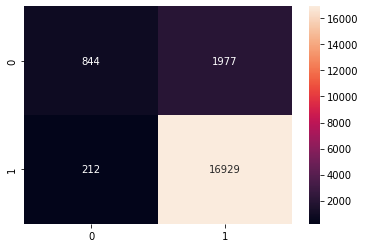

In [8]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='')

# Ethics & Privacy

For our ethical review, we consulted the ‘’Data Science Ethics Checklist’’ by deon (https://deon.drivendata.org/), which contains check items for every data-related project. When people make a review on Steam, they get the option to choose whether it is public, only for their friends, or private.
Nevertheless, we have chosen to use an anonymous data set for privacy reasons and avoid creating a potential bias by including personal information like gender for instance. Besides that, we also avoid the risk of unintended harm by choosing the anonymous data, where we avoid online abuse or physical harm being conducted upon the participants since their private information will be kept private in every way. 
Also, since some reviews are already private, this equalizes all the reviews together and Steam has provided this data. Their own website does have a privacy policy about for their users (https://store.steampowered.com/privacy_agreement/) so people must approve that. Despite the anonymity, we will also not use the data for any other purposes than our project. We have chosen a huge dataset which hopefully minimizes our potential bias. 
We are very aware of potential risks like p-hacking and wrongly sampling sizing and will pay attention to those. Any very odd outliers will be investigated and taken seriously. We know the source of our data and will share the dataset in our proposal for total transparency.

# Team Expectations 

We communicate through Discord where we either write each other and/or make calls, whatever is necessary for the discussion we need to have. We will also try to meet on campus in person in a while and work on the project together. 
We all respect each others way of working and we reach a consensus in good consultation. Also, we try to take everyones preferences considering topics for instance in consideration and so far this worked us very smoothly. When someone has a hard time makgin their deadline, we communicate this early upfront and help each other out.
The tasks that have to be done are assigned to everyone based on their own preferences and competencies. Some might be assigned to everyone and some might be assigned to one person, as long as there is clear communication about it and everybody agrees this works for us.

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/19  |  7 PM |  Brainstorm topics/questions | Discuss interesting topics; Determine best form of communication; Discuss approach to project | 
| 4/24  |  8 PM (talk over Discord) |  Edit the document with your piece of work | Help each other out with the final pieces; Discuss how to tackle our deadlines in the future; Submit first version of the project | 
| 5/7  | 10 AM  | Everyone had feedbacked another projct | Discuss how we are tackling our project; Assign group members to lead each specific part   |
| 5/18  | 6 PM  | Talk to TA about feedback (Lily) | Discuss the TA's feedback; Discuss further handling/progress on assigned pieces   |
| 5/20  | 10 PM  | Begin programming for project (Alex) | Discuss/edit project code; Submit Checkpoint |
| 5/25  | 12 PM  | Complete analysis | Discuss/edit full project; Write discussion and conclusion of the project |
| 6/8  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
